In [69]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import confusion_matrix as confusion

In [30]:
sales = [5384,8081,10282,9156,6118,9139,12460,10717,7825,9693,15177,10990]

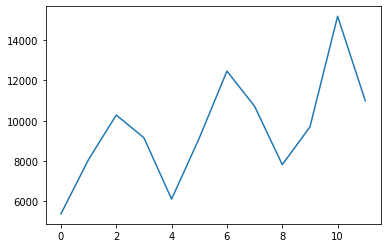

In [6]:
plt.plot(sales)
plt.show()
# the sales appear to spike and drop every two months (4 month cycle) whilst trending upwards over the cycles

In [23]:
def movavg(data,t):
    result = []
    for x in range(t):
        result.append(0)
    for x in range(len(data)):
        result.append(sum(data[x:x+t])/t)
    return result

In [24]:
movavg(sales,4)

[0,
 0,
 0,
 0,
 8225.75,
 8409.25,
 8673.75,
 9218.25,
 9608.5,
 10035.25,
 10173.75,
 10853.0,
 10921.25,
 8965.0,
 6541.75,
 2747.5]

In [27]:
def expsmooth(data,t):
    result = []
    for x in range(t):
        result.append(0)
    for x in range(len(data)):
        result.append(round(result[-1]+(0.5*(data[x]-result[-1])),2))
        #result.append(sum(data[x:x+t])/t)
    return result

In [28]:
expsmooth(sales,4)

[0,
 0,
 0,
 0,
 2692.0,
 5386.5,
 7834.25,
 8495.12,
 7306.56,
 8222.78,
 10341.39,
 10529.19,
 9177.1,
 9435.05,
 12306.02,
 11648.01]

In [32]:
seasonal_sales = [[5384,8081,10282,9156],[6118,9139,12460,10717],[7825,9693,15177,10990]]

In [67]:
seasonal_average = []
month_seasonal_average = [[],[],[],[]]

for x in seasonal_sales:
    seasonal_average.append(sum(x)/4)

for e,x in enumerate(sales):
    month_seasonal_average[e%4].append(x/seasonal_average[e%3])

print(seasonal_average)
print(month_seasonal_average)

[8225.75, 9608.5, 10921.25]
[[0.6545299820685044, 0.6367278971743768, 0.7164930754263478], [0.8410261747411146, 0.8368089733318073, 1.17837279275446], [0.941467322879707, 1.514755493420053, 1.5795389498881198], [1.1130899917940613, 1.115366602487381, 1.0062950669566213]]


In [68]:
for e,x in enumerate(expsmooth(sales,4)[-4:]):
    month_seasonal_average[e%4].append(x/seasonal_average[e%3])
print(month_seasonal_average)

[[0.6545299820685044, 0.6367278971743768, 0.7164930754263478, 1.1156551074370118], [0.8410261747411146, 0.8368089733318073, 1.17837279275446, 0.9819482749648748], [0.941467322879707, 1.514755493420053, 1.5795389498881198, 1.1267959253748427], [1.1130899917940613, 1.115366602487381, 1.0062950669566213, 1.4160423061726894]]
